<a href="https://colab.research.google.com/github/FrancescoBalzan/pymdp/blob/master/Active_Inference_Guess_Game2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install inferactively-pymdp

### Imports

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
def plot_likelihood(matrix, title_str = "Likelihood distribution (A)"):
    """
    Plots a 2-D likelihood matrix as a heatmap
    """

    if not np.isclose(matrix.sum(axis=0), 1.0).all():
      raise ValueError("Distribution not column-normalized! Please normalize (ensure matrix.sum(axis=0) == 1.0 for all columns)")

    fig = plt.figure(figsize = (6,6))
    ax = sns.heatmap(matrix, cmap = 'gray', cbar = False, vmin = 0.0, vmax = 1.0)
    plt.title(title_str)
    plt.show()


def plot_beliefs(belief_dist, title_str=""):
    """
    Plot a categorical distribution or belief distribution, stored in the 1-D numpy vector `belief_dist`
    """

    if not np.isclose(belief_dist.sum(), 1.0):
      raise ValueError("Distribution not normalized! Please normalize")

    plt.grid(zorder=0)
    plt.bar(range(belief_dist.shape[0]), belief_dist, color='r', zorder=3)
    plt.xticks(range(belief_dist.shape[0]))
    plt.title(title_str)
    plt.show()

In [50]:
import pymdp
from pymdp import utils

In [51]:
context_names = ['bah', 'baH', 'bAh', 'bAH', 'Bah', 'BaH', 'BAh', 'BAH']

choice_names = ['Start', 'HintBeard', 'HintEye', 'HintHair', 'bah', 'baH', 'bAh', 'bAH', 'Bah', 'BAH', 'BAh', 'BAH',]

num_states = [len(context_names), len(choice_names)]
num_factors = len(num_states)

context_action_names = ['Do-nothing']
choice_action_names = choice_names


""" Define `num_controls` below """
num_controls = [len(context_action_names), len(choice_action_names)]

hint_obs_names = ['Null','not important', 'important']
reward_obs_names = ['Null', 'Loss', 'Reward']
choice_obs_names = choice_action_names

""" Define `num_obs` and `num_modalities` below """
num_obs = [len(hint_obs_names), len(reward_obs_names), len(choice_obs_names)]
num_modalities = len(num_obs)

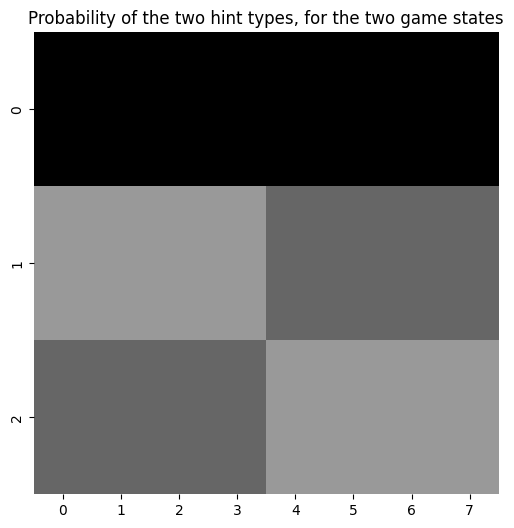

In [52]:
""" Generate the A array """
A = utils.obj_array( num_modalities )

p_hint = 1 # accuracy of the hint, according to the agent's generative model (how much does the agent trust the hint?)

A_hint = np.zeros( (len(hint_obs_names), len(context_names), len(choice_names)) )

for choice_id, choice_name in enumerate(choice_names):
    for context_id, context_name in enumerate(context_names):

        if choice_name == 'HintBeard':
            if '{0:03b}'.format(context_id)[0]=='1':
                A_hint[1:,context_id,choice_id] = [0.4,0.6]
            else:
                A_hint[1:,context_id,choice_id] = [0.6,0.4]

        elif choice_name == 'HintEye':
            if '{0:03b}'.format(context_id)[1]=='1':
                A_hint[1:,context_id,choice_id] = [0,1]
            else:
                A_hint[1:,context_id,choice_id] = [1,0]

        elif choice_name == 'HintHair':
            if '{0:03b}'.format(context_id)[2]=='1':
                A_hint[1:,context_id,choice_id] = [0,1]
            else:
                A_hint[1:,context_id,choice_id] = [1,0]

        elif choice_name in ['Start', 'bah', 'baH', 'bAh', 'bAH', 'Bah', 'BAH', 'BAh', 'BAH',]:
            A_hint[0,:,choice_id] = 1.0

A[0] = A_hint

plot_likelihood(A[0][:,:,1], title_str = "Probability of the two hint types, for the two game states")

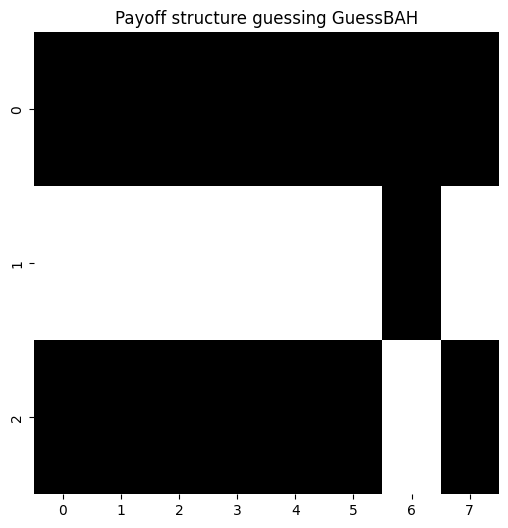

In [53]:
p_reward = 1 # probability of getting a rewarding outcome

A_reward = np.zeros((len(reward_obs_names), len(context_names), len(choice_names)))

# choice_names = ['HintBeard', 'HintEye', 'HintHair', 'GuessBAH', 'Guessbah']
for choice_id, choice_name in enumerate(choice_names):
    if choice_name in ['Start', 'HintBeard', 'HintEye', 'HintHair']:

        A_reward[0,:,choice_id] = 1.0
    else:
        for context_id, context_name in enumerate(context_names):
            if choice_name == context_name:
                A_reward[1:,context_id,choice_id] = [0,1]
            else:
                A_reward[1:,context_id,choice_id] = [1,0]

A[1] = A_reward

plot_likelihood(A[1][:,:,10], 'Payoff structure guessing GuessBAH')

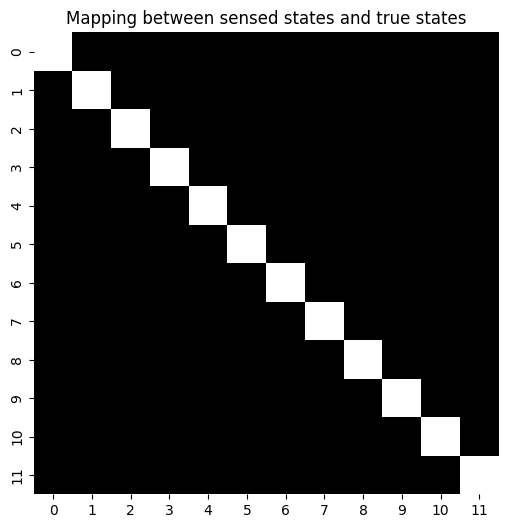

In [54]:
#not sure what is this one

A_choice = np.zeros((len(choice_obs_names), len(context_names), len(choice_names)))

for choice_id in range(len(choice_names)):

  A_choice[choice_id, :, choice_id] = 1.0

A[2] = A_choice

#""" Condition on context (first hidden state factor) and display the remaining indices (outcome and choice state) """
#
plot_likelihood(A[2][:,0,:], "Mapping between sensed states and true states")

### The `B` array

In [55]:
B = utils.obj_array(num_factors)

B_context = np.zeros( (len(context_names), len(context_names), len(context_action_names)) )

B_context[:,:,0] = np.eye(len(context_names))

B[0] = B_context
B_context

array([[[1.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00]],

       [[0.00],
        [1.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00]],

       [[0.00],
        [0.00],
        [1.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00]],

       [[0.00],
        [0.00],
        [0.00],
        [1.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00]],

       [[0.00],
        [0.00],
        [0.00],
        [0.00],
        [1.00],
        [0.00],
        [0.00],
        [0.00]],

       [[0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [1.00],
        [0.00],
        [0.00]],

       [[0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [1.00],
        [0.00]],

       [[0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0

In [56]:
B_choice = np.zeros( (len(choice_names), len(choice_names), len(choice_action_names)) )

for choice_i in range(len(choice_names)):

  B_choice[choice_i, :, choice_i] = 1.0

B[1] = B_choice
B_choice


array([[[1.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
        [1.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
        [1.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
        ...,
        [1.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
        [1.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
        [1.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00]],

       [[0.00, 1.00, 0.00, ..., 0.00, 0.00, 0.00],
        [0.00, 1.00, 0.00, ..., 0.00, 0.00, 0.00],
        [0.00, 1.00, 0.00, ..., 0.00, 0.00, 0.00],
        ...,
        [0.00, 1.00, 0.00, ..., 0.00, 0.00, 0.00],
        [0.00, 1.00, 0.00, ..., 0.00, 0.00, 0.00],
        [0.00, 1.00, 0.00, ..., 0.00, 0.00, 0.00]],

       [[0.00, 0.00, 1.00, ..., 0.00, 0.00, 0.00],
        [0.00, 0.00, 1.00, ..., 0.00, 0.00, 0.00],
        [0.00, 0.00, 1.00, ..., 0.00, 0.00, 0.00],
        ...,
        [0.00, 0.00, 1.00, ..., 0.00, 0.00, 0.00],
        [0.00, 0.00, 1.00, ..., 0.00, 0.00, 0.00],
        [0.00, 0.00, 1.00, ..., 0.00, 0.00, 0.00]],

       ...,

       [[0.00, 0.00, 0.0

### The `C` vectors

In [57]:
""" Explain `obj_array_zeros` and how you don't have to populate them necessarily """
C = utils.obj_array_zeros(num_obs)

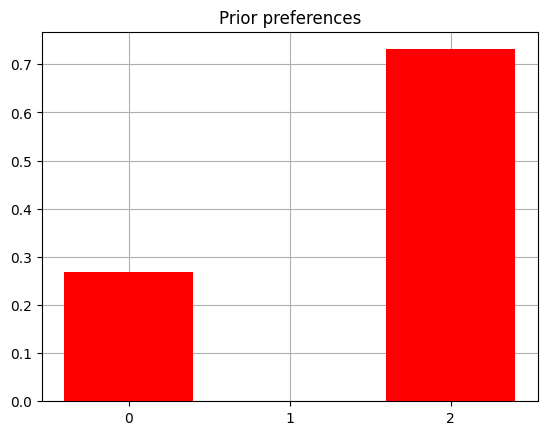

In [58]:
from pymdp.maths import softmax

C_reward = np.zeros(len(reward_obs_names))
C_reward[1] = -10.0
C_reward[2] = 1.0

C[1] = C_reward

plot_beliefs(softmax(C_reward), title_str = "Prior preferences")

### The `D` vectors

In [59]:
D = utils.obj_array(num_factors)

D_context = np.ones(len(context_names))/len(context_names)

D[0] = D_context

D_choice = np.zeros(len(choice_names))

D_choice[choice_names.index("Start")] = 1.0

D[1] = D_choice

print(f'Beliefs about which arm is better: {D[0]}')
print(f'Beliefs about starting location: {D[1]}')

Beliefs about which arm is better: [0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12]
Beliefs about starting location: [1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]


## **Constructing an `Agent`**

In [60]:

class GuessFace(object):

  def __init__(self, context = None, p_hint = 1.0, p_reward = 1.0):

    self.context_names = context_names[:]

    if context == None:
      self.context = self.context_names[utils.sample(np.ones(len(context_names))/len(context_names))] # randomly sample which bandit arm is better (Left or Right)
    else:
      self.context = context

    self.context_id = self.context_names.index(self.context)

    print(self.context, self.context_id, '{0:03b}'.format(self.context_id))
    self.p_hint = p_hint
    self.p_reward = p_reward

    self.reward_obs_names = reward_obs_names[:]
    self.hint_obs_names = hint_obs_names[:]

  def step(self, action):

    observed_hint = "Null"
    observed_reward = "Null"
    observed_choice = "Start"
    if action == "Start":
        pass
    elif action == 'HintBeard':
        if '{0:03b}'.format(self.context_id)[0]=='1':
            observed_hint = self.hint_obs_names[utils.sample(np.array([0, 0, 1]))]
        else:
            observed_hint = self.hint_obs_names[utils.sample(np.array([0, 1, 0]))]
    elif action == 'HintEye':
        if '{0:03b}'.format(self.context_id)[1]=='1':
            observed_hint = self.hint_obs_names[utils.sample(np.array([0, 0, 1]))]
        else:
            observed_hint = self.hint_obs_names[utils.sample(np.array([0, 1, 0]))]
    elif action == 'HintHair':
        if '{0:03b}'.format(self.context_id)[2]=='1':
            observed_hint = self.hint_obs_names[utils.sample(np.array([0, 0, 1]))]
        else:
            observed_hint = self.hint_obs_names[utils.sample(np.array([0, 1, 0]))]

    elif self.context == action:
        observed_reward = self.reward_obs_names[utils.sample(np.array([0, 0, 1]))]
    else:
        observed_reward = self.reward_obs_names[utils.sample(np.array([0, 1, 0]))]


    observed_choice = action



    obs = [observed_hint, observed_reward, observed_choice]

    return obs



In [61]:

def run_active_inference_loop(my_agent, my_env, T = 5):

  """ Initialize the first observation """
  obs_label = ["Null", "Null", "Start"]  # agent observes itself seeing a `Null` hint, getting a `Null` reward, and seeing itself in the `Start` location
  obs = [hint_obs_names.index(obs_label[0]), reward_obs_names.index(obs_label[1]), choice_obs_names.index(obs_label[2])]

  for t in range(T):
    qs = my_agent.infer_states(obs)
    #plot_beliefs(qs[0], title_str = f"Beliefs about the context at time {t}")
    print("Beliefs about the context at time ", qs[0])

    q_pi, efe = my_agent.infer_policies()
    print("value of actions>", q_pi)
    chosen_action_id = my_agent.sample_action()
    movement_id = int(chosen_action_id[1])

    choice_action = choice_action_names[movement_id]

    obs_label = my_env.step(choice_action)

    obs = [hint_obs_names.index(obs_label[0]), reward_obs_names.index(obs_label[1]), choice_obs_names.index(obs_label[2])]
    print(f'Action at time {t}: {choice_action} Reward: {obs_label[1]} Observation: {obs_label[2]} Hint: {obs_label[0]}')



In [67]:
from pymdp.agent import Agent
np.printoptions(precision=2, suppress=True)
np.set_printoptions(formatter={'float': '{:.2f}'.format})

C[1][1] = -1
my_agent = Agent(A = A, B = B, C = C, D = D)

p_hint_env = 1.0 # this is the "true" accuracy of the hint
p_reward_env = 1.0 # this is the "true" reward probability

env = GuessFace(p_hint = p_hint_env, p_reward = p_reward_env)
print(f'Context: {env.context}')

T = 7
run_active_inference_loop(my_agent, env, T = T)

#context_names = ['bah', 'baH', 'bAh', 'bAH', 'Bah', 'BAH', 'BAh', 'BAH', ]


BAh 6 110
Context: BAh
Beliefs about the context at time  [0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12]
value of actions> [0.00 0.00 0.50 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
Action at time 0: HintEye Reward: Null Observation: HintEye Hint: important
Beliefs about the context at time  [0.00 0.00 0.25 0.25 0.00 0.00 0.25 0.25]
value of actions> [0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
Action at time 1: HintHair Reward: Null Observation: HintHair Hint: not important
Beliefs about the context at time  [0.00 0.00 0.50 0.00 0.00 0.00 0.50 0.00]
value of actions> [0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.00 0.00 0.00 0.50 0.00]
Action at time 2: bAh Reward: Loss Observation: bAh Hint: Null
Beliefs about the context at time  [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00]
value of actions> [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00]
Action at time 3: BAh Reward: Reward Observation: BAh Hint: Null
Beliefs about the context at time  [0.00 0.00 0.00 0.00 0.00 0.

In [63]:
a = np.array([2.5e-17,0.123])
print(a)

[0.00 0.12]


In [64]:
from pymdp.agent import Agent

C[1][1] = 0.0 # makes the Loss "less aversive" than before (higher prior prior probability assigned to seeing the Loss outcome). This should make the agent less risk-averse / willing to explore both arms, under uncertainty

my_agent = Agent(A = A, B = B, C = C, D = D) # redefine the agent with the new preferences
env = GuessFace(p_hint = 1, p_reward = 1) # re-initialize the environment -- this time, the hint is not always accurate (`p_hint = 0.8`)
print(f'Context: {env.context}')

run_active_inference_loop(my_agent, env, T = T)

BAh 6 110
Context: BAh
Beliefs about the context at time  [0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12]
value of actions> [0.00 0.00 0.42 0.42 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
Action at time 0: HintEye Reward: Null Observation: HintEye Hint: important
Beliefs about the context at time  [0.00 0.00 0.25 0.25 0.00 0.00 0.25 0.25]
value of actions> [0.00 0.00 0.00 0.03 0.00 0.00 0.19 0.19 0.00 0.19 0.19 0.19]
Action at time 1: bAh Reward: Loss Observation: bAh Hint: Null
Beliefs about the context at time  [0.00 0.00 0.00 0.33 0.00 0.00 0.33 0.33]
value of actions> [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.25 0.00 0.25 0.25 0.25]
Action at time 2: bAH Reward: Loss Observation: bAH Hint: Null
Beliefs about the context at time  [0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.50]
value of actions> [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.33 0.33 0.33]
Action at time 3: BAH Reward: Loss Observation: BAH Hint: Null
Beliefs about the context at time  [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00]
value o